In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def sim(time_axis, u, r, alpha,n_trials):
    w = np.zeros((n_trials, len(time_axis)))
    v = np.zeros((n_trials, len(time_axis)))
    delta = np.zeros((n_trials, len(time_axis)))

    for trial in range(n_trials):
        # transfer weights from iteration before
        if(trial != 0):
            w[trial,:] = w[trial-1, :]

        for t in time_axis[:-1]:
            if t == 0:
                continue
            # calculate prediction error 
            delta[trial,t] = r[trial,t] + v[trial-1,t + 1] - v[trial-1,t]
            if(delta[trial,t] != 0):
                for tau in range(t + 1):
                    if(delta[trial,t] * u[trial,t - tau] != 0):
                        w[trial,tau] = w[trial,tau] + alpha * delta[trial,t] * u[trial,t - tau]
        # update v
        for t in time_axis:
            v_sum = 0
            for tau in range(t+1):
                v_sum = v_sum + w[trial,tau] * u[trial,t-tau]
            v[trial,t] = v_sum

    return v, delta, w


In [3]:
# recapitulate book figure

t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,190:211] = norm.pdf(range(190,211), 200, 1) * 2

v, delta, w = sim(time_axis, u, r, alpha, n_trials)

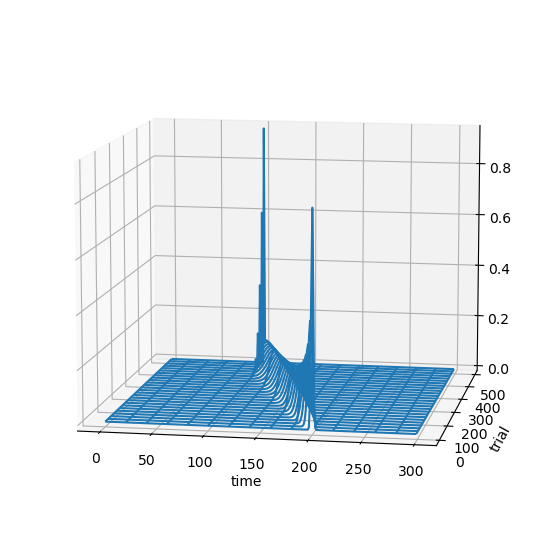

In [4]:
# plot results

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [5]:
# higher learning rate

t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.5

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,190:211] = norm.pdf(range(190,211), 200, 1) * 2

v, delta, w = sim(time_axis, u, r, alpha, n_trials)


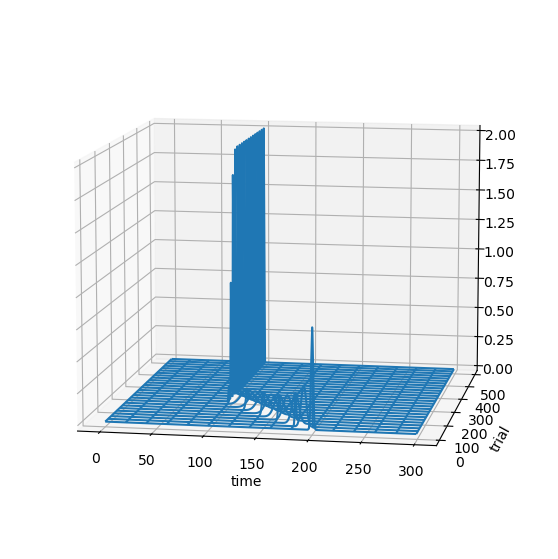

In [6]:
# plot results

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))

ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [7]:
# lower learning rate

t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.05

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,190:211] = norm.pdf(range(190,211), 200, 1) * 2

v, delta, w = sim(time_axis, u, r, alpha, n_trials)

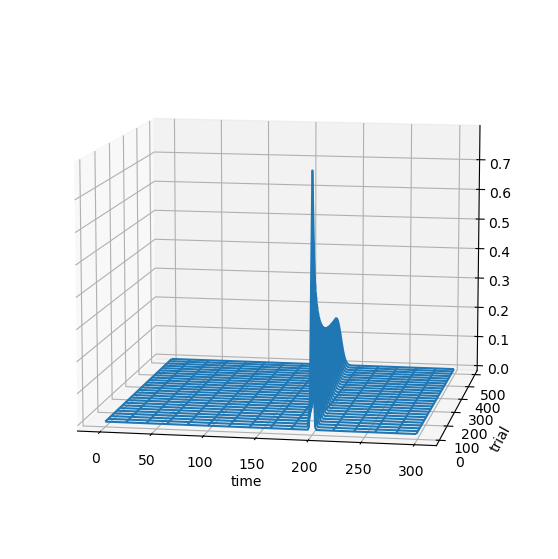

In [8]:
# plot results

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))

ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [9]:
# stochastic rewards

t_start = 0
t_end = 300
t_stimulus = 100
t_reward_mu = 200
t_reward_sigma = 5
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1

# draw random samples
t_rewards = np.random.normal(t_reward_mu, t_reward_sigma, n_trials).astype(int)

for trial in range(n_trials):
    r[trial, t_rewards[trial]-10:t_rewards[trial]+11] = norm.pdf(range(190,211), 200, 1) * 2


v, delta, w = sim(time_axis, u, r, alpha, n_trials)

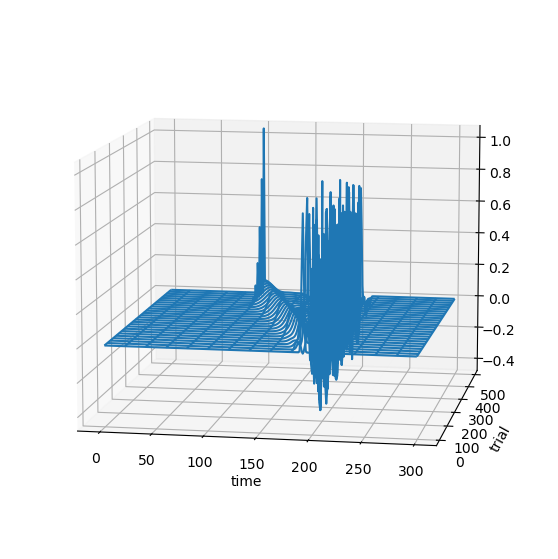

In [10]:
# plot results

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))

ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

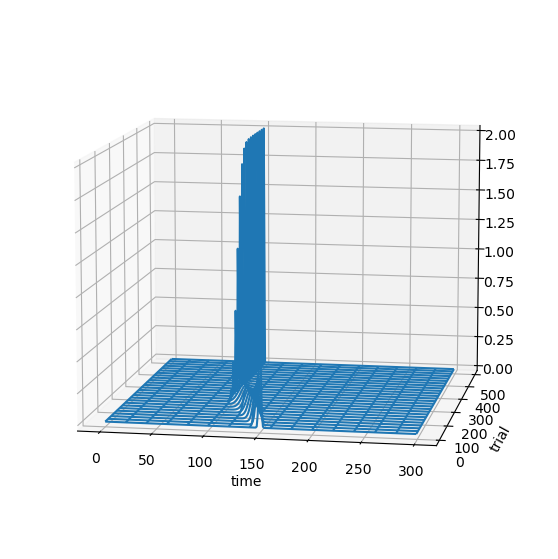

In [11]:
# earlier reward
t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,140:161] = norm.pdf(range(140,161), 150, 1) * 2

v, delta, w = sim(time_axis, u, r, alpha, n_trials)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [ ]:
# later reward
t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,240:261] = norm.pdf(range(240,261), 250, 1) * 2

v, delta, w = sim(time_axis, u, r, alpha, n_trials)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [ ]:
# higher reward

t_start = 0
t_end = 300
t_stimulus = 100
t_reward = 200
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1
r[:,190:211] = norm.pdf(range(190,211), 200, 1) * 5

v, delta, w = sim(time_axis, u, r, alpha, n_trials)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

plt.show()

In [ ]:
# stochastic rewards (yes or no) 90%

t_start = 0
t_end = 300
t_stimulus = 100
t_reward_mu = 200
t_reward_sigma = 5
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1

# draw random samples
t_rewards = np.random.binomial(1, 0.9, n_trials)

for trial in range(n_trials):
    if(t_rewards[trial] == 1):
        r[trial,190:211] = norm.pdf(range(190,211), 200, 1) * 2   
        
v, delta, w = sim(time_axis, u, r, alpha, n_trials)



In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, delta, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')

In [ ]:
# stochastic rewards (yes or no) 50%

t_start = 0
t_end = 300
t_stimulus = 100
t_reward_mu = 200
t_reward_sigma = 5
n_trials = 500
alpha = 0.2

time_axis = np.arange(t_start, t_end)
u = np.zeros((n_trials, len(time_axis)))
r = np.zeros((n_trials, len(time_axis)))
u[:,t_stimulus] = 1

# draw random samples
t_rewards = np.random.binomial(1, 0.5, n_trials)

for trial in range(n_trials):
    if(t_rewards[trial] == 1):
        r[trial,190:211] = norm.pdf(range(190,211), 200, 1) * 2   
        
v, delta, w = sim(time_axis, u, r, alpha, n_trials)


In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(time_axis, range(n_trials))
ax.plot_wireframe(X, Y, r, rstride=20, cstride=20)
ax.view_init(10, -80)
ax.set_xlabel('time')
ax.set_ylabel('trial')